# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv',delimiter=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv',delimiter=';')

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

azdias.head(50)


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3,1,2,2.0,3,1,5,2,2,5,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,-1,2,2,5.0,1,5,1,5,4,3,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,-1,1,1,3.0,3,3,4,1,3,2,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,-1,3,1,3.0,4,4,2,4,2,2,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,-1,3,2,4.0,2,4,2,3,5,4,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


In [4]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [5]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [6]:
feat_info.describe()

,attribute,information_level,type,missing_or_unknown
count,85,85,85,85
unique,85,9,5,9
top,KBA05_ANTG4,person,ordinal,[-1]
freq,1,43,49,26


In [7]:
print(feat_info)

                attribute information_level         type missing_or_unknown
0                AGER_TYP            person  categorical             [-1,0]
1    ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2               ANREDE_KZ            person  categorical             [-1,0]
3           CJT_GESAMTTYP            person  categorical                [0]
4       FINANZ_MINIMALIST            person      ordinal               [-1]
5           FINANZ_SPARER            person      ordinal               [-1]
6        FINANZ_VORSORGER            person      ordinal               [-1]
7          FINANZ_ANLEGER            person      ordinal               [-1]
8   FINANZ_UNAUFFAELLIGER            person      ordinal               [-1]
9        FINANZ_HAUSBAUER            person      ordinal               [-1]
10              FINANZTYP            person  categorical               [-1]
11            GEBURTSJAHR            person      numeric                [0]
12        GF

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [8]:
azdias.isnull().sum().sum()

4896838

In [9]:
# Identify missing or unknown data values and convert them to NaNs.

for col in azdias.columns:
    
    i = feat_info.index[feat_info.attribute == col][0]
    missstr = feat_info.at[i, 'missing_or_unknown']
    miss = missstr[1:-1].split(",")
    
    m =[int(mis) if (mis!='X' and mis!='XX' and mis!='') else mis for mis in miss]
    azdias[col].replace(m,np.nan,inplace=True)


In [10]:
azdias.isnull().sum().sum()

8373929

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [11]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

missing_percent = azdias.isnull().sum()/len(azdias)*100
print(missing_percent)


AGER_TYP                 76.955435
ALTERSKATEGORIE_GROB      0.323264
ANREDE_KZ                 0.000000
CJT_GESAMTTYP             0.544646
FINANZ_MINIMALIST         0.000000
FINANZ_SPARER             0.000000
FINANZ_VORSORGER          0.000000
FINANZ_ANLEGER            0.000000
FINANZ_UNAUFFAELLIGER     0.000000
FINANZ_HAUSBAUER          0.000000
FINANZTYP                 0.000000
GEBURTSJAHR              44.020282
GFK_URLAUBERTYP           0.544646
GREEN_AVANTGARDE          0.000000
HEALTH_TYP               12.476816
LP_LEBENSPHASE_FEIN      10.954859
LP_LEBENSPHASE_GROB      10.611509
LP_FAMILIE_FEIN           8.728699
LP_FAMILIE_GROB           8.728699
LP_STATUS_FEIN            0.544646
LP_STATUS_GROB            0.544646
NATIONALITAET_KZ         12.153551
PRAEGENDE_JUGENDJAHRE    12.136608
RETOURTYP_BK_S            0.544646
SEMIO_SOZ                 0.000000
SEMIO_FAM                 0.000000
SEMIO_REL                 0.000000
SEMIO_MAT                 0.000000
SEMIO_VERT          

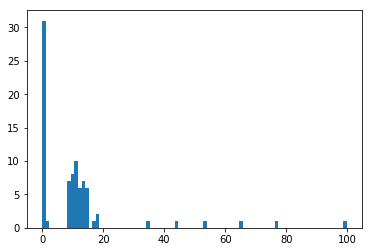

In [12]:
# Investigate patterns in the amount of missing data in each column.
plt.hist(missing_percent,bins = 85);


In [13]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
drop_cols = missing_percent[missing_percent>20].index.tolist()
print(drop_cols)

['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']


In [14]:
azdias = azdias.drop(drop_cols,axis =1)
azdias.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1,2.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2,5.0,1,5,2,5,4,5,1,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


#### Discussion 1.1.2: Assess Missing Data in Each Column

An assessment is performed to calculate the amount of missing data in each column. Missing values are reported as percent of total number of values (observations) in the dataset. In order to make a sound decision regarding the outliers, we can plot a histogram. The histogram above clearly shows that majority of columns with non missing values lies well within $20\%$ limit of missing percent values. A threshold value of $20\%$ was choosen based on the histogram and columns with higher percent of missing values were dropped from the dataset. Below is the list of dropped columns along with their missing percent values.

|Column Name|Missing Percent|
|-----------|---------------|
|AGER_TYP   |     76.955435 |
|GEBURTSJAHR|     44.020282 |
|TITEL_KZ   |     99.757636 |
|ALTER_HH   |     34.813699 |
|KK_KUNDENTYP|    65.596749 |
|KBA05_BAUMAX|    53.468668 |


#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

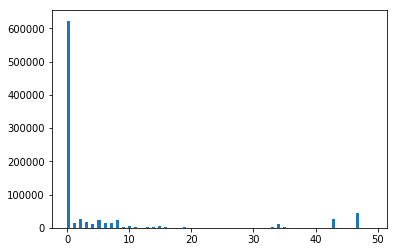

In [15]:
# How much data is missing in each row of the dataset?
missing_rowwise = azdias.isnull().sum(axis=1)
row_percent = missing_rowwise.tolist()
plt.hist(row_percent,bins = 100);

In [16]:
n_obs = []
for i in range(0,20):
    azdias_few_missing = azdias[azdias.isnull().sum(axis=1) <= i]
    n_obs.append(azdias_few_missing.shape[0])
print(n_obs)

[623209, 638947, 666873, 684502, 697109, 719624, 733395, 747109, 771701, 774743, 780153, 781280, 782046, 785301, 787544, 792287, 794792, 795469, 795897, 797077]


[ 69.92754883  71.6934408   74.82689479  76.80496757  78.21954375
  80.74585316  82.29103668  83.82982448  86.58918495  86.93051443
  87.5375468   87.66400253  87.74995203  88.11518131  88.3668585
  88.89904973  89.1801248   89.256088    89.304112    89.43651462]


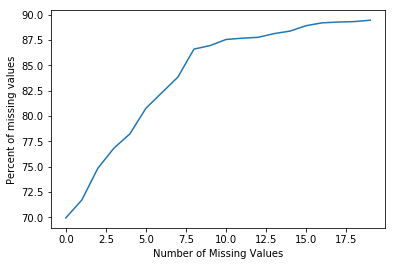

In [17]:
l = azdias.shape[0]
nobs = np.asarray(n_obs)/l*100
print(nobs)
plt.plot(range(0,20),nobs)
plt.ylabel('Percent of missing values');
plt.xlabel('Number of Missing Values');

In [18]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
def comparision(data,threshold,n_cols):
    zero_missing = data[data.isnull().sum(axis=1) == 0]
    above_missing = data[data.isnull().sum(axis=1) > threshold]
    below_missing = data[data.isnull().sum(axis=1) <= threshold]
    column_names = above_missing.columns.tolist()
    column_names = column_names[:n_cols]
    fig, axes = plt.subplots(nrows=len(column_names), ncols=3, figsize = (10,15))
    fig.subplots_adjust(hspace=1,wspace = 0.5)
    fig.suptitle("Comparision of distribution of above and below threshold ({} columns) missing dataset".format(threshold))

    for i in range(0,len(column_names)):
        sns.countplot(zero_missing[column_names[i]],ax = axes[i][0]);
        axes[i][0].set_title("No missing dataset")
        axes[i][0].set_xlabel(column_names[i])
        sns.countplot(below_missing[column_names[i]],ax = axes[i][1]);
        axes[i][1].set_title("Below threshold missing dataset")
        axes[i][1].set_xlabel(column_names[i])
        sns.countplot(above_missing[column_names[i]],ax = axes[i][2]);
        axes[i][2].set_title("Above threshold missing dataset")
        axes[i][2].set_xlabel(column_names[i])
    

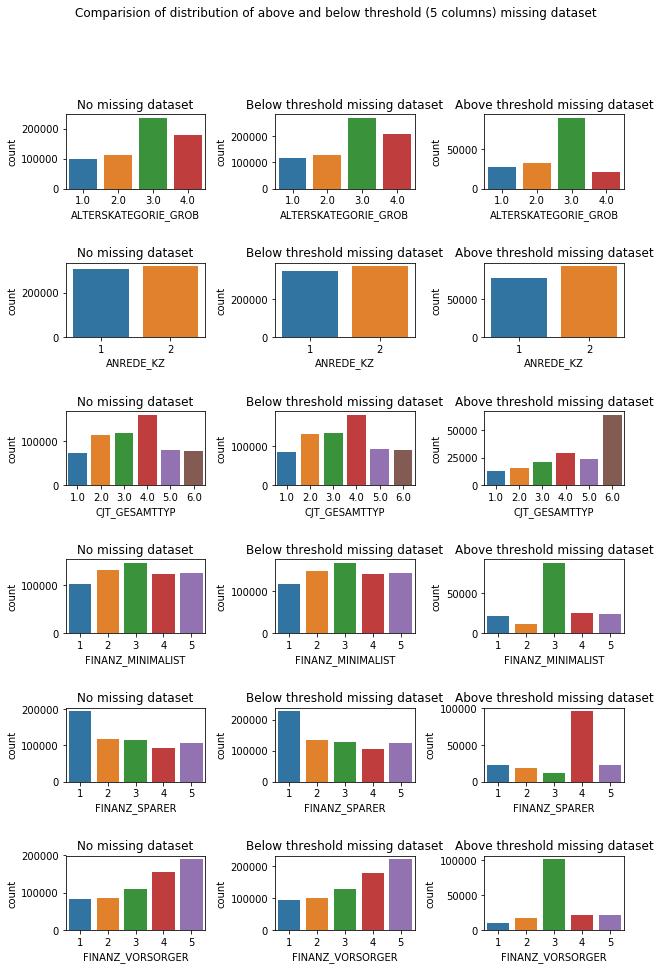

In [19]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
comparision(azdias,5,6) # threshold = 5, number of columns = 6
#comparision(azdias,9,6) # threshold = 9

In [20]:
azdias_clean = azdias[azdias.isnull().sum(axis=1) == 0]

#### Discussion 1.1.3: Assess Missing Data in Each Row

A histogram of row wise missing values gives greater insight into the data. We can see that there is $\sim70\%$ data with no missing column value. This would imply that the missing column data is approximately $30\%$ and is negligible compared to no missing data. For example, number of observations with just only one missing column value are 15738, which is just $1.76\%$ of total number of observations. Similar trend is visible for other numbers of missing columns. So comparing no missing datset with an exact number of missing column dataset would not make much sense. One may think of dividing the dataset into three subsets, first is no missing dataset, second is atleast one and atmost given threshold number of column missing dataset and third is more than threshold missing dataset. For this division of data, we plotted the distribution of six columns. Following observations can be made from the bar chart.
- Below threshold missing dataset or few missing dataset has the similar distribution as no missing dataset. Reason for this behaviour is explained above.
- Difference between the counts of below threshold missing dataaet and above threshold dataset is order of magnitude higher. 
- Below threshold missing dataset is an approximate representation of the whole dataset.
- There is a significant qualitative difference between data with lots of missing values with few or no missing values.

For the rest of the analysis, we are considering the subset of data with no missing values.


### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [21]:
# How many features are there of each data type?
column_names = azdias_clean.columns.tolist()
feature_presents = feat_info[feat_info['attribute'].isin(column_names)]
feature_presents.type.value_counts()

ordinal        49
categorical    18
mixed           6
numeric         6
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [22]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

feature_presents.head()
cat_attribute = feature_presents[feature_presents["type"] == "categorical"]["attribute"]
bin_cat = []
multi_cat = []
for cat in cat_attribute:
    if (len(azdias_clean[cat].unique()) == 2):
        bin_cat.append(cat)
    elif (len(azdias_clean[cat].unique()) > 2):
        multi_cat.append(cat)
    
print("Binary Categories",bin_cat)
print("Multi-level Categories",multi_cat)

Binary Categories ['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']
Multi-level Categories ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


In [23]:
for cat in bin_cat:
    print(cat, azdias_clean[cat].unique())

    
for cat in multi_cat:
    print(cat, azdias_clean[cat].unique())
    

ANREDE_KZ [2 1]
GREEN_AVANTGARDE [0 1]
SOHO_KZ [ 1.  0.]
VERS_TYP [ 2.  1.]
OST_WEST_KZ ['W' 'O']
CJT_GESAMTTYP [ 5.  3.  2.  4.  1.  6.]
FINANZTYP [1 5 2 4 6 3]
GFK_URLAUBERTYP [ 10.   5.   1.  12.   9.   3.   8.  11.   4.   7.   6.   2.]
LP_FAMILIE_FEIN [  5.   1.  10.   2.   7.  11.   8.   4.   6.   9.   3.]
LP_FAMILIE_GROB [ 3.  1.  5.  2.  4.]
LP_STATUS_FEIN [  2.   3.   4.   1.  10.   9.   5.   6.   7.   8.]
LP_STATUS_GROB [ 1.  2.  5.  4.  3.]
NATIONALITAET_KZ [ 1.  2.  3.]
SHOPPER_TYP [ 3.  2.  0.  1.]
ZABEOTYP [5 4 1 6 3 2]
GEBAEUDETYP [ 8.  1.  3.  5.]
CAMEO_DEUG_2015 ['8' '4' '6' '2' '1' '9' '5' '7' '3']
CAMEO_DEU_2015 ['8A' '4C' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5D' '9E' '9B' '1B' '8B' '7A'
 '3D' '4E' '3C' '5A' '7B' '9A' '6E' '6D' '2C' '5C' '9C' '7D' '5E' '1D' '8D'
 '6C' '5B' '7C' '4D' '3A' '2B' '7E' '4B' '2A' '3B' '6F' '5F' '1C' '6A']


In [24]:
# Re-encode categorical variable(s) to be kept in the analysis.
encode = {'W': 0, 'O':1}
azdias_clean = azdias_clean.replace({'OST_WEST_KZ':encode})
azdias_clean['OST_WEST_KZ'].unique()

array([0, 1])

In [25]:
# Drop multi-level categoricals variables
for cat in multi_cat:
    azdias_clean.drop(cat,axis=1, inplace = True)


In [26]:
azdias_clean.describe()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,...,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000
mean,2.792540,1.511211,3.057793,2.677015,3.451430,2.770220,2.563095,3.169596,0.234626,2.207486,...,2.229087,2.832587,1.631794,0.718529,1.985612,3.614714,3.350438,3.199007,5.394508,3.113073
std,1.026485,0.499875,1.360774,1.469261,1.388873,1.448796,1.372308,1.365483,0.423765,0.758644,...,0.977913,0.917406,0.984108,0.731720,1.476932,0.960938,1.113337,0.989195,2.295721,1.351074
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.000000
50%,3.000000,2.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,0.000000,2.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,3.000000,3.000000,3.000000,5.000000,3.000000
75%,4.000000,2.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,0.000000,3.000000,...,3.000000,4.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.000000
max,4.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,3.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,5.000000,9.000000,5.000000


#### Discussion 1.2.1: Re-Encode Categorical Features

I did the re-encoding analysis on the clean data with no missing column values. Here are the choices and decisions:
- For binary categories 'ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ' and 'VERS_TYP' numerical values were kept as it is.
- OST_WEST_KZ categorical value which initially had 'W' 'O' values has been replaced with 0 and 1 numerical values.
- All multi-level categorical variables were dropped from the analysis.


#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [27]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

decade = {1:40, 2:40, 3:50, 4:50, 5:60, 6:60, 7:60, 8:70, 9:70, 10:80, 11:80, 12:80, 13:80, 14:90, 15:90}

movement = {1:0, 2:1, 3:0, 4:1, 5:0, 6:1, 7:1, 8:0, 9:1, 10:0, 11:1, 12:0, 13:1, 14:0, 15:1}

azdias_clean['DECADE'] = azdias_clean['PRAEGENDE_JUGENDJAHRE']
azdias_clean['DECADE'].replace(decade, inplace = True)

azdias_clean['MOVEMENT'] = azdias_clean['PRAEGENDE_JUGENDJAHRE']
azdias_clean['MOVEMENT'].replace(movement, inplace = True)


In [28]:
azdias_clean['DECADE'].unique()

array([ 90.,  70.,  50.,  80.,  60.,  40.])

In [29]:
azdias_clean['MOVEMENT'].unique()

array([ 0.,  1.])

In [30]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
wealth = {'11':1, '12':1, '13':1, '14':1, '15':1,
          '21':2, '22':2, '23':2, '24':2, '25':2,
          '31':3, '32':3, '33':3, '34':3, '35':3,
          '41':4, '42':4, '43':4, '44':4, '45':4,
          '51':5, '52':5, '53':5, '54':5, '55':5}

life = {'11':1, '12':2, '13':3, '14':4, '15':5,
        '21':1, '22':2, '23':3, '24':4, '25':5,
        '31':1, '32':2, '33':3, '34':4, '35':5,
        '41':1, '42':2, '43':3, '44':4, '45':5,
        '51':1, '52':2, '53':3, '54':4, '55':5}

In [31]:
azdias_clean['WEALTH'] = azdias_clean['CAMEO_INTL_2015']
azdias_clean['WEALTH'].replace(wealth, inplace = True)

azdias_clean['LIFE'] = azdias_clean['CAMEO_INTL_2015']
azdias_clean['LIFE'].replace(life, inplace = True)


In [32]:
azdias_clean['LIFE'].unique()

array([1, 4, 3, 2, 5])

In [33]:
azdias_clean['WEALTH'].unique()

array([5, 2, 4, 1, 3])

In [34]:
mixed_attribute = feature_presents[feature_presents["type"] == "mixed"]["attribute"]
mixed_attribute = mixed_attribute.tolist()

print(mixed_attribute)

azdias_clean.drop(mixed_attribute,axis=1,inplace=True)


['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'PRAEGENDE_JUGENDJAHRE', 'WOHNLAGE', 'CAMEO_INTL_2015', 'PLZ8_BAUMAX']


In [35]:
azdias_clean.describe()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE
count,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,...,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000
mean,2.792540,1.511211,3.057793,2.677015,3.451430,2.770220,2.563095,3.169596,0.234626,2.207486,...,0.718529,3.614714,3.350438,3.199007,5.394508,3.113073,73.097564,0.234626,3.326605,2.875790
std,1.026485,0.499875,1.360774,1.469261,1.388873,1.448796,1.372308,1.365483,0.423765,0.758644,...,0.731720,0.960938,1.113337,0.989195,2.295721,1.351074,14.515340,0.423765,1.457813,1.499305
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000,0.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.000000,...,0.000000,3.000000,3.000000,3.000000,4.000000,2.000000,60.000000,0.000000,2.000000,1.000000
50%,3.000000,2.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,0.000000,2.000000,...,1.000000,3.000000,3.000000,3.000000,5.000000,3.000000,70.000000,0.000000,4.000000,3.000000
75%,4.000000,2.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,0.000000,3.000000,...,1.000000,4.000000,4.000000,4.000000,7.000000,4.000000,90.000000,0.000000,5.000000,4.000000
max,4.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,3.000000,...,2.000000,5.000000,5.000000,5.000000,9.000000,5.000000,90.000000,1.000000,5.000000,5.000000


#### Discussion 1.2.2: Engineer Mixed-Type Features

I did the re-encoding of mixed-type features on the clean data with no missing column values. Here are the choices and decisions:
- Two new column variables DECADE and MOVEMENT were created to capture the two dimensions: an interval-type variable for decade, and a binary variable for movement from PRAEGENDE_JUGENDJAHRE variable.
- Two new column variables WEALTH and LIFE were created to capture the wealth and life stage by directly encoding the values using a dictionary.
- After creating the new columns, the following columns were droped from the clean dataset 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'PRAEGENDE_JUGENDJAHRE', 'WOHNLAGE', 'CAMEO_INTL_2015' and 'PLZ8_BAUMAX'


#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [36]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

In [37]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [38]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    df_clean = df
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    for col in df_clean.columns:
        i = feat_info.index[feat_info.attribute == col][0]
        missstr = feat_info.at[i, 'missing_or_unknown']
        miss = missstr[1:-1].split(",")
        m =[int(mis) if (mis!='X' and mis!='XX' and mis!='') else mis for mis in miss]
        df_clean[col].replace(m,np.nan,inplace = True)
        # print("in")
    #missing_percent = df.isnull().sum()/len(df)*100
    
    drop_cols = ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']
    
    # drop_cols = missing_percent[missing_percent>cp].index.tolist()
    # plt.hist(missing_percent,bins = 100);
    # remove selected columns and rows, ...
    #for col in drop_cols:
    df_clean.drop(columns = drop_cols, inplace = True)
        
        
    #print(df_clean.isnull().sum(axis=1))
    
    df_clean = df_clean[df_clean.isnull().sum(axis=1) <= 0]
    
    # select, re-encode, and engineer column values.
    column_names = df_clean.columns.tolist()
    
    feature_presents = feat_info[feat_info['attribute'].isin(column_names)]
    cat_attribute = feature_presents[feature_presents["type"] == "categorical"]["attribute"]
    
    bin_cat = []
    multi_cat = []
    
    for cat in cat_attribute:
        if (len(df[cat].unique()) == 2):
            bin_cat.append(cat)
        elif (len(df[cat].unique()) > 2):
            multi_cat.append(cat)
    ost_encode = {'W': 0, 'O':1}
    
    df_clean.replace({'OST_WEST_KZ':ost_encode},inplace = True)
    
    # Drop multi-level categoricals variables
    
    for cat in multi_cat:
        df_clean.drop(cat,axis=1, inplace = True)
        
    # Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
        
    decade = {1:40, 2:40, 3:50, 4:50, 5:60, 6:60, 7:60, 8:70,
              9:70, 10:80, 11:80, 12:80, 13:80, 14:90, 15:90}

    movement = {1:0, 2:1, 3:0, 4:1, 5:0, 6:1, 7:1, 8:0,
                9:1, 10:0, 11:1, 12:0, 13:1, 14:0, 15:1}

    df_clean['DECADE'] = df_clean['PRAEGENDE_JUGENDJAHRE']
    df_clean['DECADE'].replace(decade, inplace = True)

    df_clean['MOVEMENT'] = df_clean['PRAEGENDE_JUGENDJAHRE']
    df_clean['MOVEMENT'].replace(movement, inplace = True)
    
    # Investigate "CAMEO_INTL_2015" and engineer two new variables.
    
    wealth = {'11':1, '12':1, '13':1, '14':1, '15':1,
          '21':2, '22':2, '23':2, '24':2, '25':2,
          '31':3, '32':3, '33':3, '34':3, '35':3,
          '41':4, '42':4, '43':4, '44':4, '45':4,
          '51':5, '52':5, '53':5, '54':5, '55':5}

    life = {'11':1, '12':2, '13':3, '14':4, '15':5,
            '21':1, '22':2, '23':3, '24':4, '25':5,
            '31':1, '32':2, '33':3, '34':4, '35':5,
            '41':1, '42':2, '43':3, '44':4, '45':5,
            '51':1, '52':2, '53':3, '54':4, '55':5}

    df_clean['WEALTH'] = df_clean['CAMEO_INTL_2015']
    df_clean['WEALTH'].replace(wealth, inplace = True)

    df_clean['LIFE'] = df_clean['CAMEO_INTL_2015']
    df_clean['LIFE'].replace(life, inplace = True)

    mixed_attribute = feature_presents[feature_presents["type"] == "mixed"]["attribute"]
    
    #mixed_attribute = mixed_attribute.tolist()
    
    for feature in mixed_attribute:
        df_clean.drop(feature,axis=1,inplace=True)
    
    # Return the cleaned dataframe.
    return df_clean
    

In [39]:
data = pd.read_csv('Udacity_AZDIAS_Subset.csv',delimiter=';')


In [40]:
data_clean = clean_data(data)

data_clean.describe()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/li

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE
count,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,...,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000,623209.000000
mean,2.792540,1.511211,3.057793,2.677015,3.451430,2.770220,2.563095,3.169596,0.234626,2.207486,...,0.718529,3.614714,3.350438,3.199007,5.394508,3.113073,73.097564,0.234626,3.326605,2.875790
std,1.026485,0.499875,1.360774,1.469261,1.388873,1.448796,1.372308,1.365483,0.423765,0.758644,...,0.731720,0.960938,1.113337,0.989195,2.295721,1.351074,14.515340,0.423765,1.457813,1.499305
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000,0.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.000000,...,0.000000,3.000000,3.000000,3.000000,4.000000,2.000000,60.000000,0.000000,2.000000,1.000000
50%,3.000000,2.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,0.000000,2.000000,...,1.000000,3.000000,3.000000,3.000000,5.000000,3.000000,70.000000,0.000000,4.000000,3.000000
75%,4.000000,2.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,0.000000,3.000000,...,1.000000,4.000000,4.000000,4.000000,7.000000,4.000000,90.000000,0.000000,5.000000,4.000000
max,4.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,3.000000,...,2.000000,5.000000,5.000000,5.000000,9.000000,5.000000,90.000000,1.000000,5.000000,5.000000


## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [41]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

# azdias_clean contains no missing values
azdias_clean.isnull().sum().sum()

0

In [42]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler,Imputer
scaler = StandardScaler();
data = scaler.fit_transform(azdias_clean);
header = azdias_clean.columns.tolist()

In [43]:
azdias_scaled = pd.DataFrame(data,columns = header)

In [44]:
azdias_scaled.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE
0,-1.746291,0.977825,-1.512224,1.581058,-1.045042,1.539058,1.047073,1.340482,-0.553670,1.044647,...,0.384670,1.441599,0.583438,-0.201181,-0.171845,0.656462,1.164454,-0.553670,1.147882,-1.251108
1,0.202107,0.977825,-1.512224,0.900443,-1.765051,-0.531628,0.318373,1.340482,1.806129,1.044647,...,-0.981973,0.400949,0.583438,-0.201181,-0.171845,-0.823844,1.164454,1.806129,-0.909997,0.749822
2,0.202107,-1.022678,0.692406,0.219828,0.394976,-1.221857,0.318373,-0.856545,-0.553670,1.044647,...,0.384670,-0.639702,-0.314764,0.809743,0.263748,1.396614,-0.213400,-0.553670,0.461922,0.082845
3,-1.746291,0.977825,-0.042471,-1.141401,1.114984,-0.531628,-0.410328,1.340482,-0.553670,1.044647,...,0.384670,1.441599,1.481640,-1.212105,-1.043032,-0.083691,-1.591253,-0.553670,1.147882,0.749822
4,-0.772092,0.977825,-1.512224,1.581058,-1.765051,1.539058,1.047073,-0.124203,-0.553670,-0.273496,...,-0.981973,1.441599,1.481640,0.809743,0.263748,-0.083691,0.475527,-0.553670,-0.909997,-0.584131


### Discussion 2.1: Apply Feature Scaling

We have been using the dataset with no missing value, hence no imputing is required at this point. Feature scaling is done using StandardScaler function.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [45]:
# Apply PCA to the data.
from sklearn.decomposition import PCA
pca = PCA();
pca.fit_transform(azdias_scaled);


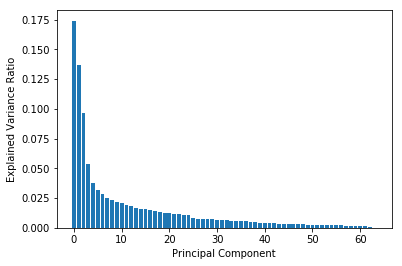

In [46]:
# Investigate the variance accounted for by each principal component.
plt.bar(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_);
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio");


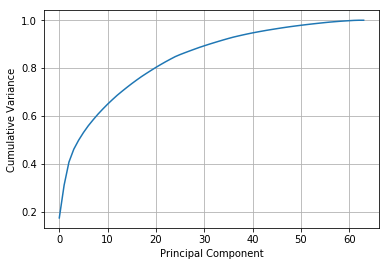

In [47]:
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_));
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Variance");
plt.grid(True)

In [48]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca30 = PCA(n_components=30)
azdias_reduced = pca30.fit_transform(azdias_scaled)

### Discussion 2.2: Perform Dimensionality Reduction

Based on cumulative variance plot, number of principal components for dimensionality reduction are chosen to be 30. 30 features explain approximately $90\%$ of the variance.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [49]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def principal_component(pca,i):
    pca_components = pd.DataFrame(pca.components_,columns = header)
    weights = pca_components.iloc[i].sort_values(ascending = False)
    return weights

In [50]:
print(principal_component(pca30,0))

PLZ8_ANTG3               0.213717
PLZ8_ANTG4               0.207552
WEALTH                   0.197155
HH_EINKOMMEN_SCORE       0.195056
ORTSGR_KLS9              0.184226
EWDICHTE                 0.181220
FINANZ_SPARER            0.165814
KBA05_ANTG4              0.146317
FINANZ_HAUSBAUER         0.144909
PLZ8_ANTG2               0.141630
ARBEIT                   0.137235
SEMIO_PFLICHT            0.134194
SEMIO_REL                0.131591
KBA05_ANTG3              0.131532
ANZ_HAUSHALTE_AKTIV      0.130111
DECADE                   0.126725
RELAT_AB                 0.124980
SEMIO_TRADV              0.120267
SEMIO_RAT                0.110213
SEMIO_MAT                0.097791
FINANZ_UNAUFFAELLIGER    0.094741
SEMIO_FAM                0.094596
SEMIO_KULT               0.092752
FINANZ_ANLEGER           0.087291
REGIOTYP                 0.072318
OST_WEST_KZ              0.060086
SEMIO_SOZ                0.052666
KKK                      0.045745
HEALTH_TYP               0.038563
PLZ8_HHZ      

In [51]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
print(principal_component(pca30,1))

ALTERSKATEGORIE_GROB     0.245188
SEMIO_ERL                0.224264
FINANZ_VORSORGER         0.213828
SEMIO_LUST               0.169071
RETOURTYP_BK_S           0.161124
FINANZ_HAUSBAUER         0.130939
SEMIO_KRIT               0.122087
W_KEIT_KIND_HH           0.119924
PLZ8_ANTG3               0.117823
SEMIO_KAEM               0.115433
PLZ8_ANTG4               0.112917
EWDICHTE                 0.110806
ORTSGR_KLS9              0.110599
WEALTH                   0.092701
ANREDE_KZ                0.090215
ARBEIT                   0.083185
KBA05_ANTG4              0.082804
PLZ8_ANTG2               0.077960
RELAT_AB                 0.077828
ANZ_HAUSHALTE_AKTIV      0.073376
SEMIO_DOM                0.070563
HH_EINKOMMEN_SCORE       0.068501
KBA05_ANTG3              0.062075
WOHNDAUER_2008           0.052494
FINANZ_MINIMALIST        0.040815
OST_WEST_KZ              0.037311
ANZ_HH_TITEL             0.032877
REGIOTYP                 0.031267
VERS_TYP                 0.029860
PLZ8_HHZ      

In [52]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

print(principal_component(pca30,2))

SEMIO_VERT               0.348014
SEMIO_SOZ                0.263596
SEMIO_FAM                0.251414
SEMIO_KULT               0.231457
FINANZ_MINIMALIST        0.156671
RETOURTYP_BK_S           0.116013
FINANZ_VORSORGER         0.098248
W_KEIT_KIND_HH           0.094846
ALTERSKATEGORIE_GROB     0.082353
SEMIO_REL                0.076441
SEMIO_LUST               0.073295
MOVEMENT                 0.050847
GREEN_AVANTGARDE         0.050847
EWDICHTE                 0.049060
ORTSGR_KLS9              0.048823
SEMIO_MAT                0.048769
PLZ8_ANTG4               0.046400
PLZ8_ANTG3               0.045843
WOHNDAUER_2008           0.034884
ARBEIT                   0.033022
RELAT_AB                 0.031364
PLZ8_ANTG2               0.030337
KBA05_ANTG4              0.029294
ANZ_HAUSHALTE_AKTIV      0.026814
WEALTH                   0.024853
VERS_TYP                 0.020775
ANZ_HH_TITEL             0.014529
OST_WEST_KZ              0.012424
ANZ_TITEL                0.010450
KBA05_ANTG3   

### Discussion 2.3: Interpret Principal Components

We can see the weights associated with different variables are different for first few principle components. Here are some of the interpretations of positive and negative values of the principle components.

- From the 1st principle component, we can see that WEALTH has positive values whereas, LIFE has negative value. This imply, as wealth increases life quality also increases (lower value higher quality based on data dictionary)
- Variables such as SEMIO_ERL, SEMIO_RAT, SEMIO_KRIT     , SEMIO_DOM, SEMIO_KAEM have same sign of values in all the principle components which indicate they can be grouped into a single category. This is also evident form the data dictionary.


## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [53]:
# Over a number of different cluster counts...
from sklearn.cluster import KMeans

centers = []
scores = []
for cluster in range(1,21):
    centers.append(cluster)
    kmeans_i = KMeans(cluster)
    model_i = kmeans_i.fit(azdias_reduced)
    score_i = np.abs(model_i.score(azdias_reduced))
    scores.append(score_i)

    # run k-means clustering on the data and...
    
    # compute the average within-cluster distances.
    
    

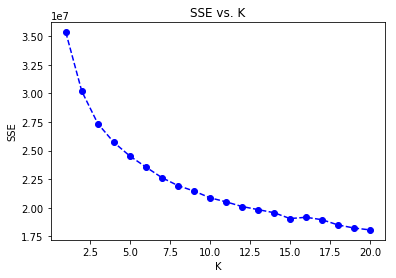

In [54]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');


In [55]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

kmeans_14 = KMeans(n_clusters = 14)
model_14 = kmeans_14.fit(azdias_reduced)
azdias_pred = model_14.predict(azdias_reduced)

### Discussion 3.1: Apply Clustering to General Population

From the plot above, $K = 14$ seems like a good enough value to cluster the population data. 

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [56]:
# Load in the customer demographics data.
df = pd.read_csv('Udacity_CUSTOMERS_Subset.csv',delimiter=';')
df.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,191652.000000,191652.000000,191652.000000,188439.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,...,138888.000000,138888.000000,138888.000000,138888.000000,138888.000000,138888.000000,138888.000000,141176.000000,141176.000000,141176.000000
mean,0.344359,3.060907,1.376432,3.677928,3.963773,2.057051,4.183317,2.439808,2.646176,2.781176,...,2.537404,2.731510,1.388817,0.539939,1.556607,3.634893,3.622192,2.824850,5.119517,2.898510
std,1.391672,1.086254,0.484492,1.813975,1.036230,1.319422,0.995365,1.697932,1.586506,1.147353,...,0.904927,0.840922,0.885038,0.637048,1.185736,0.933660,1.008472,1.012415,2.159184,1.422683
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,-1.000000,3.000000,1.000000,2.000000,3.000000,1.000000,3.000000,1.000000,1.000000,2.000000,...,2.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,2.000000,4.000000,2.000000
50%,0.000000,3.000000,1.000000,4.000000,4.000000,1.000000,5.000000,2.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,0.000000,1.000000,3.000000,4.000000,3.000000,5.000000,3.000000
75%,2.000000,4.000000,2.000000,6.000000,5.000000,4.000000,5.000000,5.000000,5.000000,3.000000,...,3.000000,3.000000,2.000000,1.000000,1.000000,4.000000,4.000000,4.000000,7.000000,4.000000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.000000


In [57]:
df_clean = clean_data(df)
df_clean.describe()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/li

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE
count,115643.000000,115643.000000,115643.000000,115643.000000,115643.000000,115643.000000,115643.000000,115643.000000,115643.000000,115643.000000,...,115643.000000,115643.000000,115643.000000,115643.000000,115643.000000,115643.000000,115643.000000,115643.000000,115643.000000,115643.000000
mean,3.529154,1.323452,4.285171,1.395709,4.596353,1.551516,1.795448,2.769904,0.531628,1.954074,...,0.543388,3.631884,3.611641,2.836817,5.163244,2.921638,58.433541,0.531628,2.605865,3.396531
std,0.677143,0.467796,1.003081,0.797901,0.819966,0.959433,0.928984,1.291275,0.499001,0.765816,...,0.638228,0.924912,1.006694,1.005569,2.158596,1.420083,13.172809,0.499001,1.408235,1.336950
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000,0.000000,1.000000,1.000000
25%,3.000000,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,2.000000,0.000000,1.000000,...,0.000000,3.000000,3.000000,2.000000,4.000000,2.000000,50.000000,0.000000,1.000000,3.000000
50%,4.000000,1.000000,5.000000,1.000000,5.000000,1.000000,2.000000,2.000000,1.000000,2.000000,...,0.000000,3.000000,4.000000,3.000000,5.000000,3.000000,60.000000,1.000000,2.000000,4.000000
75%,4.000000,2.000000,5.000000,2.000000,5.000000,2.000000,2.000000,4.000000,1.000000,3.000000,...,1.000000,4.000000,4.000000,4.000000,7.000000,4.000000,70.000000,1.000000,4.000000,4.000000
max,4.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,3.000000,...,2.000000,5.000000,5.000000,5.000000,9.000000,5.000000,90.000000,1.000000,5.000000,5.000000


In [59]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

# fill_missing = Imputer(strategy='most_frequent')
# df_clean_imputed = pd.DataFrame(fill_missing.fit_transform(df_clean))
# df_clean_imputed.columns = df_clean.columns
# df_clean_imputed.index = df_clean.index

#df_clean_scaled = scaler.fit_transform(df_clean_imputed)

df_clean_scaled = scaler.fit_transform(df_clean)
df_clean_scaled = pd.DataFrame(df_clean_scaled, columns=list(df_clean))


df_pca = pca30.fit_transform(df_clean_scaled)
df_pred = model_14.predict(df_pca)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

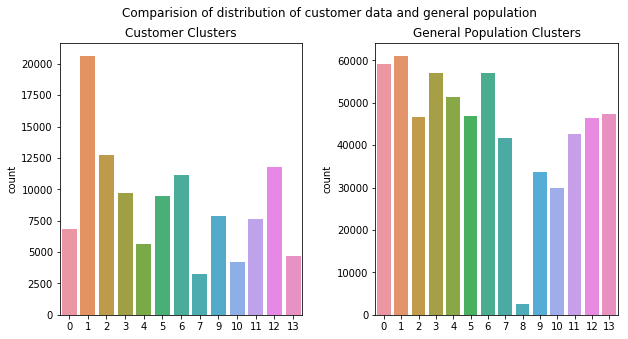

In [60]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,5))
fig.subplots_adjust(hspace=1,wspace = 0.3)
fig.suptitle("Comparision of distribution of customer data and general population")

sns.countplot(df_pred, ax=axes[0]);
axes[0].set_title('Customer Clusters');
sns.countplot(azdias_pred, ax=axes[1]);
axes[1].set_title('General Population Clusters');


In [64]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

over_represented = scaler.inverse_transform(pca30.inverse_transform(model_14.cluster_centers_[1]))
over_represented = pd.Series(data = over_represented, index = df_clean_scaled.columns)
over_represented

ALTERSKATEGORIE_GROB        3.915931
ANREDE_KZ                   0.993620
FINANZ_MINIMALIST           5.527891
FINANZ_SPARER               0.811166
FINANZ_VORSORGER            5.108419
FINANZ_ANLEGER              0.803302
FINANZ_UNAUFFAELLIGER       1.454549
FINANZ_HAUSBAUER            1.787269
GREEN_AVANTGARDE            1.095643
HEALTH_TYP                  1.728293
RETOURTYP_BK_S              4.354353
SEMIO_SOZ                   4.867880
SEMIO_FAM                   4.337522
SEMIO_REL                   3.216713
SEMIO_MAT                   4.113323
SEMIO_VERT                  6.458107
SEMIO_LUST                  6.544440
SEMIO_ERL                   4.274247
SEMIO_KULT                  4.611749
SEMIO_RAT                   2.187288
SEMIO_KRIT                  2.796477
SEMIO_DOM                   3.184676
SEMIO_KAEM                  2.095590
SEMIO_PFLICHT               2.200062
SEMIO_TRADV                 2.683832
ANZ_PERSONEN                2.617005
ANZ_TITEL                   0.064916
H

In [65]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

under_represented = scaler.inverse_transform(pca30.inverse_transform(model_14.cluster_centers_[7]))
under_represented = pd.Series(data = under_represented, index = df_clean_scaled.columns)
under_represented


ALTERSKATEGORIE_GROB        3.455311
ANREDE_KZ                   1.498873
FINANZ_MINIMALIST           4.402066
FINANZ_SPARER               1.973226
FINANZ_VORSORGER            3.917721
FINANZ_ANLEGER              2.213487
FINANZ_UNAUFFAELLIGER       2.549478
FINANZ_HAUSBAUER            1.965672
GREEN_AVANTGARDE            0.800642
HEALTH_TYP                  1.710123
RETOURTYP_BK_S              3.606722
SEMIO_SOZ                   4.136248
SEMIO_FAM                   3.297066
SEMIO_REL                   3.061428
SEMIO_MAT                   3.400970
SEMIO_VERT                  4.782711
SEMIO_LUST                  5.519981
SEMIO_ERL                   4.940772
SEMIO_KULT                  3.392333
SEMIO_RAT                   3.095183
SEMIO_KRIT                  4.370406
SEMIO_DOM                   4.344370
SEMIO_KAEM                  3.837969
SEMIO_PFLICHT               2.933326
SEMIO_TRADV                 3.071523
ANZ_PERSONEN                2.237306
ANZ_TITEL                   0.062311
H

### Discussion 3.3: Compare Customer Data to Demographics Data


On comparing customer data to demographic data, we can put forward following interpretations

- MALE (0.993620) population is overrepresented in the customer data compared to general population data, whereas, FEMALE (1.498873) population is underrepresented in the customer data compared to general population data. Variable that provide this information is ANREDE_KZ.
- Two important finacial categories are clearly visible as underrepreseted or overreperesnted population in customer data. These categories are FINANZ_SPARER (Money-Saver) and FINANZ_ANLEGER (Investor). People who save very high and invest very often are overrepresented and people with average saving and investments are underrepresented.
- Much more similar interpretations can be made based on the values above.

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.

## References 

- https://dfrieds.com/data-analysis/value-counts-python-pandas
